### here it's the link of the data:
https://www.kaggle.com/competitions/titanic/submissions

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [11]:
# Load dataset
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test["PassengerId"]

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



The Embarked column represents the port where each passenger boarded the Titanic. 
Values in the Embarked column:
There are three possible values in this column, each representing a different port:

C: Cherbourg, France
Q: Queenstown (now Cobh), Ireland
S: Southampton, England

Southampton (S): The majority of passengers boarded the Titanic at this port in England.
Cherbourg (C): Many passengers, especially from first and second class, boarded in Cherbourg, France.
Queenstown (Q): This was the last stop before the Titanic set sail across the Atlantic. Some third-class passengers boarded here.


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       891 non-null    object 
 12  FamilySize     891 non-null    int64  
 13  FarePerPerson  891 non-null    float64
 14  Title          891 non-null    object 
dtypes: float64(3), int64(6), object(6)
memory usage: 104.5+ KB
None


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602,19.916375
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,7.250000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,8.300000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,512.329200


In [9]:
# Check for missing values
print(data.isnull().sum())

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
FamilySize         0
FarePerPerson      0
Title              0
dtype: int64


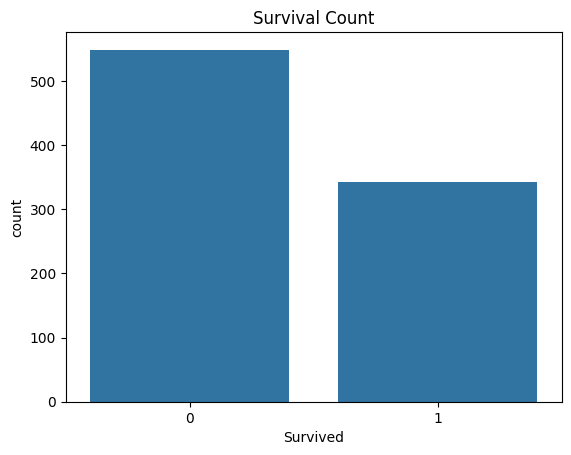

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize survival rate
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

the number of survived is lower than of people not survived

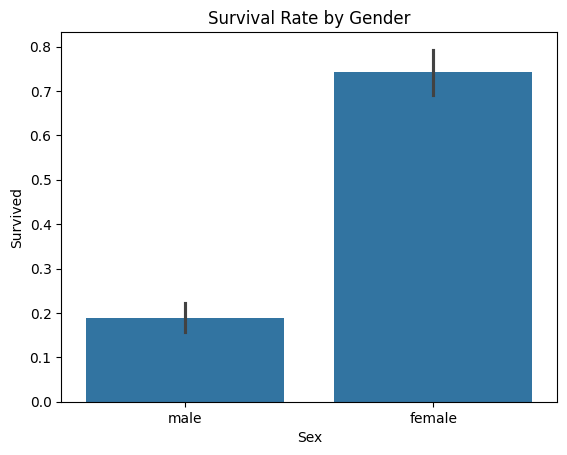

In [13]:
# Analyze survival rate by gender
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

Gender female is the most survival than male

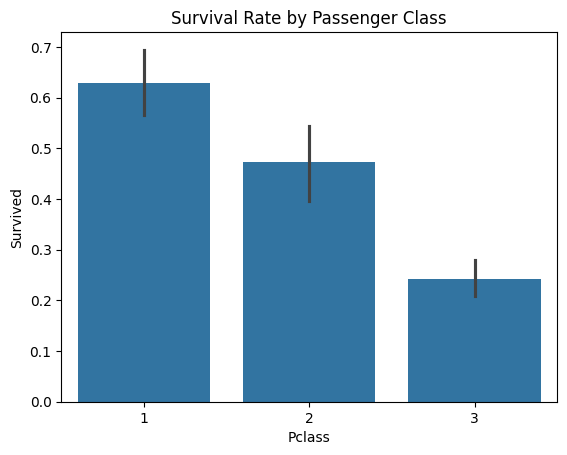

In [14]:
# Analyze survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

the first class has the most survived people then 2 class then 3 class

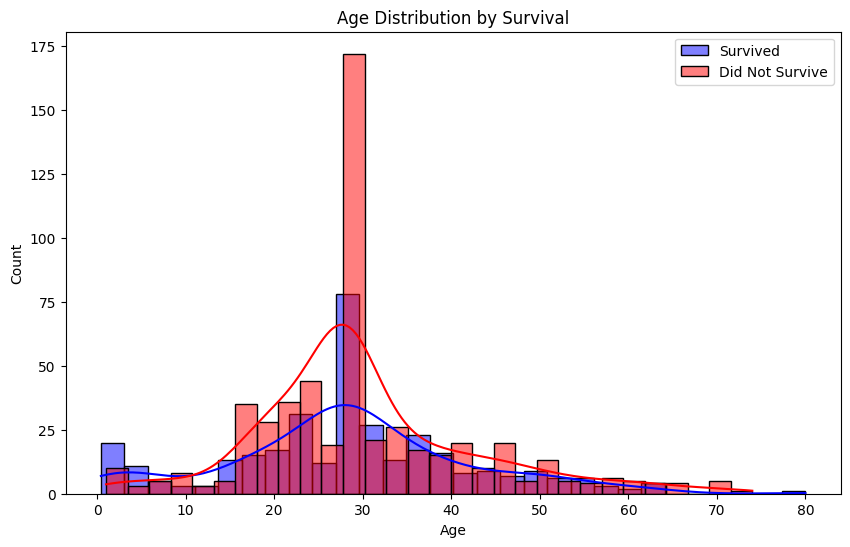

In [15]:
# Analyze survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['Age'], bins=30, kde=True, color='blue', label='Survived', alpha=0.5)
sns.histplot(data[data['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Did Not Survive', alpha=0.5)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

### people with age 30 are the most survived



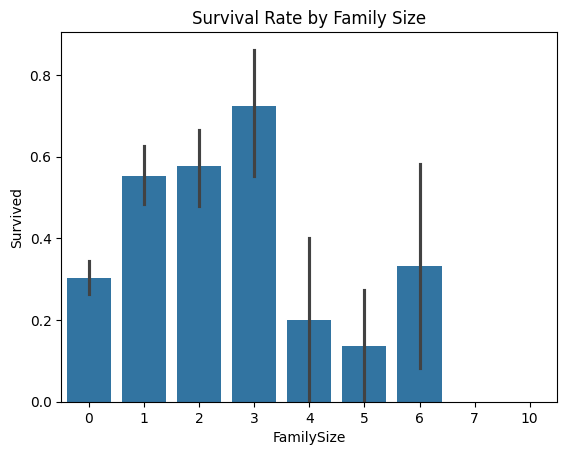

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Feature Engineering
data['FamilySize'] = data['SibSp'] + data['Parch']
data['FarePerPerson'] = data['Fare'] / (data['FamilySize'] + 1)

# Analyze survival rate by family size
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title('Survival Rate by Family Size')
plt.show()

In [23]:
# Removing the outliers
# Select only the numeric columns
new_df2 = data.copy()
numeric_df = data.select_dtypes(include=[float, int])

for col in numeric_df:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    new_df2 = data.loc[(data[col] <= upper_limit) & (data[col] >= lower_limit)]
print('before removing outliers: ', len(data))
print('after removing outliers: ', len(new_df2))
print('outliers:', len(data)-len(new_df2))

before removing outliers:  891
after removing outliers:  822
outliers: 69


### the family with 3 members then 2 then 1 are the most survived  people


# Random Forest ClaSSifier

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Load dataset
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Feature Engineering
data['FamilySize'] = data['SibSp'] + data['Parch']
data['FarePerPerson'] = data['Fare'] / (data['FamilySize'] + 1)

test['FamilySize'] = test['SibSp'] + test['Parch']
test['FarePerPerson'] = test['Fare'] / (test['FamilySize'] + 1)

# Extract 'Title' from 'Name'
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Handling missing data
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Fare'] = imputer.fit_transform(data[['Fare']])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

test['Age'] = imputer.fit_transform(test[['Age']])
test['Fare'] = imputer.fit_transform(test[['Fare']])  # Fare represent the ticket price
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# Combine both datasets to avoid unknown categories
combined_data = pd.concat([data, test], sort=False)

# Preprocessing steps: scale numerical features and encode categorical features
numeric_features = ['Pclass', 'Age', 'FarePerPerson', 'FamilySize', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked', 'Title']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])  # handle unknown categories

# Combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the model
rf = RandomForestClassifier(random_state=42)

# Create a pipeline with the preprocessor and the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)])

# Grid Search for hyperparameter tuning
params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Features and target
X = data[['Pclass', 'Age', 'FarePerPerson', 'FamilySize', 'SibSp', 'Parch', 'Title', 'Sex', 'Embarked']]
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Predictions and accuracy
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output best parameters and accuracy
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')

# Process test data for predictions
test_ids = test['PassengerId']
test_features = test[['Pclass', 'Age', 'FarePerPerson', 'FamilySize', 'SibSp', 'Parch', 'Title', 'Sex', 'Embarked']]

# Predict on the test data
submission_preds = grid_search.predict(test_features)

# Create a submission DataFrame
df = pd.DataFrame({'PassengerId': test_ids, 
                   'Survived': submission_preds})

# Save to CSV for submission to Kaggle
df.to_csv('submission.csv', index=False)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Accuracy: 0.8492


c:\Users\amira\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\amira\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

